<a href="https://colab.research.google.com/github/MorganDaviesEcon/MorganDaviesEcon.github.io/blob/main/Task10_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import usuals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
# get the wine dataset from sci-kit learn
from sklearn.datasets import load_wine

wine = load_wine()

In [ ]:
# Characteristics of the wines
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# Class of wine determined from the characteristics
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
# check the dimensions of the data
est = KMeans(n_clusters=3)
clusters = est.fit_predict(wine.data)
est.cluster_centers_.shape

(3, 13)

In [ ]:
# There are 3 clusters in 13 dimensions

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = clusters == i
    labels[mask] = mode(wine.target[mask])[0]

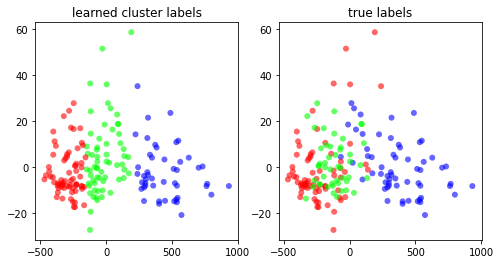

In [ ]:
# dimensionality reduction then plot the clustering next to the true label diagram to see the difference
from sklearn.decomposition import PCA

X = PCA(2).fit_transform(wine.data)

kwargs = dict(cmap=plt.cm.get_cmap("brg", 3), edgecolor="none", alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title("learned cluster labels")

ax[1].scatter(X[:, 0], X[:, 1], c=wine.target, **kwargs)
ax[1].set_title("true labels");

plt.savefig('W10wine_true_learned.png',transparent=True)

In [ ]:
# check the accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(wine.target, labels)

0.702247191011236

The model classifies 70% of the dataset accurately with no knowledge of the labels

[[46  0 13]
 [ 1 50 20]
 [ 0 19 29]]


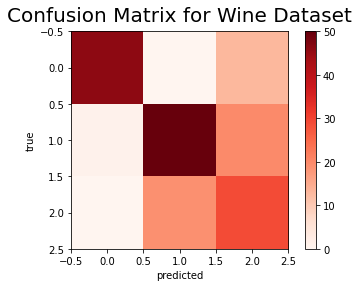

In [ ]:
# make a confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(wine.target, labels))

plt.imshow(
    confusion_matrix(wine.target, labels), cmap="Reds", interpolation="nearest"
)
plt.colorbar()
plt.grid(False)
plt.ylabel("true")
plt.xlabel("predicted");

plt.title(label="Confusion Matrix for Wine Dataset",
          fontsize=20,
          pad='10.0')

plt.savefig('W10wine_confustionmatrix.png',transparent=True)

The model has trouble differentiating between two classes of wines more so than the other (can be seen in the diagram with red and green mixed into one another)